## Model Evaluation

### ProVent Model Logistic Regression

#### Imports

In [11]:
## The usual suspects
import os
import pandas as pd
import numpy as np

## Model Scores
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

## Regression
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression

## Visuals
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

## Shap Values
import shap
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

### Load Data

In [12]:
## Neural Net Data
X_train = np.load("./data/X_train_s.npy")
X_test = np.load("./data/X_test_s.npy")

## X
x_pv_train = pd.read_csv("./data/X_pv_train.csv")
x_pv_test = pd.read_csv("./data/X_pv_test.csv")

## Y 3mo
y_3mo_train = np.load("./data/y_3mo_train_s.npy")
y_3mo_test = np.load("./data/y_3mo_test_s.npy")

## Y 1yr
y_1yr_train = np.load("./data/y_1yr_train_s.npy")
y_1yr_test = np.load("./data/y_1yr_test_s.npy")

## ProVent Model: 1yr mortality

ProVent info (from ProVent 14 publication):

```
Categorical Variable    | n (%)    | OR (95% CI)     | β Points

Age, ≥ 65 yr            | 144 (29) | 6.5 (3.8, 11.2) | 1.86  2

Age, 50–64 yr           | 162 (33) | 2.7 (1.6, 4.4)  | 0.95 1

Platelets ≤ 100 × 109/L | 63 (13)  | 3.0 (1.5, 6.1)  | 1.11 1

Vasopressors            | 78 (16)  | 3.8 (2.0, 7.2)  | 1.32 1

Hemodialysis            | 51 (10)  | 2.5 (1.1, 5.4)  | 0.93 1

Nontrauma               | 373 (76) | 2.6 (1.5, 4.6)  | 0.94 1

```

In [13]:
## training set
## Fit logistic regression on 3mo training data
## Solver: https://en.wikipedia.org/wiki/Limited-memory_BFGS
provent = LogisticRegression(solver='lbfgs')
provent.fit(x_pv_train, y_1yr_train)

## Coefficients
for i in range(0,len(x_pv_train.columns)):
    print(x_pv_train.columns[i], provent.coef_[0][i].round(3))

VPMVD7_VP 0.625
LMVD7_PLATELET_MIN 1.104
RRTMVD7_RRT 0.474
FIRST_CAREUNIT 0.491
AGE 0.869


## Predictions and Metrics

### ProVent 3mo Mortality Predictions

In [16]:
predicted = cross_val_predict(provent, x_pv_test, y_3mo_test, cv=10)
predicted_probs = cross_val_predict(provent, x_pv_test, y_3mo_test, cv=10, method='predict_proba')

tn, fp, fn, tp = confusion_matrix(y_3mo_test, predicted).ravel()
specificity = tn / (tn+fp)

print("")
print("   Classification Matrix")
print(confusion_matrix(y_3mo_test, predicted))
print("")

print("")
print("   ROC AUC")
print(roc_auc_score(y_3mo_test, predicted).round(4))
print("")

print("")
print("   Sensitivity")
print(recall_score(y_3mo_test, predicted).round(4))
print("")

print("")
print("   Specificity")
print(specificity.round(4))
print("")

print("")
print("   Accuracy")
print(accuracy_score(y_3mo_test, predicted).round(4))
print("")

print("")
print("   F1 Score")
print(f1_score(y_3mo_test, predicted).round(4))
print("")


   Classification Matrix
[[397 110]
 [214 146]]


   ROC AUC
0.5943


   Sensitivity
0.4056


   Specificity
0.783


   Accuracy
0.6263


   F1 Score
0.474



### ProVent 1yr Predictions

In [17]:
predicted = cross_val_predict(provent, x_pv_test, y_1yr_test, cv=10)
predicted_probs = cross_val_predict(provent, x_pv_test, y_1yr_test, cv=10, method='predict_proba')

tn, fp, fn, tp = confusion_matrix(y_1yr_test, predicted).ravel()
specificity = tn / (tn+fp)

print("")
print("   Classification Matrix")
print(confusion_matrix(y_1yr_test, predicted))
print("")

print("")
print("   ROC AUC")
print(roc_auc_score(y_1yr_test, predicted).round(4))
print("")

print("")
print("   Sensitivity")
print(recall_score(y_1yr_test, predicted).round(4))
print("")

print("")
print("   Specificity")
print(specificity.round(4))
print("")

print("")
print("   Accuracy")
print(accuracy_score(y_1yr_test, predicted).round(4))
print("")

print("")
print("   F1 Score")
print(f1_score(y_1yr_test, predicted).round(4))
print("")


   Classification Matrix
[[234 205]
 [117 311]]


   ROC AUC
0.6298


   Sensitivity
0.7266


   Specificity
0.533


   Accuracy
0.6286


   F1 Score
0.6589



## Neural Networks









## 1yr Mortality Neural Network

In [18]:
from tensorflow.keras.models import load_model

## For checking model file version
import h5py
import keras

model_file = "./models/1yr_Acc_0.753_26May2020_1yr_best_model.h5"
f = h5py.File(model_file, 'r')

print("Model version: ", f.attrs.get('keras_version'))
print("Keras version: ", keras.__version__)#tf.keras.__version__)
print("")

## 12M
model = keras.models.load_model(model_file)

Model version:  b'2.3.1'
Keras version:  2.3.1



In [21]:
model.summary()

Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_299 (Dense)            (None, 256)               64256     
_________________________________________________________________
activation_299 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_229 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_300 (Dense)            (None, 256)               65792     
_________________________________________________________________
activation_300 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_230 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_301 (Dense)            (None, 12)              

In [22]:
predicted = model.predict(X_test)
## Round predictions to 1/0
predicted = predicted.round()

tn, fp, fn, tp = confusion_matrix(y_1yr_test, predicted).ravel()
specificity = tn / (tn+fp)

print("")
print("   Classification Matrix")
print(confusion_matrix(y_1yr_test, predicted))
print("")

print("")
print("   ROC AUC")
print(roc_auc_score(y_1yr_test, predicted).round(4))
print("")

print("")
print("   Sensitivity")
print(recall_score(y_1yr_test, predicted).round(4))
print("")

print("")
print("   Specificity")
print(specificity.round(4))
print("")

print("")
print("   Accuracy")
print(accuracy_score(y_1yr_test, predicted).round(4))
print("")

print("")
print("   F1 Score")
print(f1_score(y_1yr_test, predicted).round(4))
print("")


   Classification Matrix
[[324 115]
 [ 99 329]]


   ROC AUC
0.7534


   Sensitivity
0.7687


   Specificity
0.738


   Accuracy
0.7532


   F1 Score
0.7546



### Shap Values

In [23]:
# at Day 7
X_colnames = ['ADMISSION_AGE',
 'VD1_HEARTRATE_MIN',
 'VD1_HEARTRATE_MAX',
 'VD1_HEARTRATE_MEAN',
 'VD1_SYSBP_MIN',
 'VD1_SYSBP_MAX',
 'VD1_SYSBP_MEAN',
 'VD1_DIASBP_MIN',
 'VD1_DIASBP_MAX',
 'VD1_DIASBP_MEAN',
 'VD1_MEANBP_MIN',
 'VD1_MEANBP_MAX',
 'VD1_MEANBP_MEAN',
 'VD1_RESPRATE_MIN',
 'VD1_RESPRATE_MAX',
 'VD1_RESPRATE_MEAN',
 'VD1_TEMPC_MIN',
 'VD1_TEMPC_MAX',
 'VD1_TEMPC_MEAN',
 'VD1_SPO2_MIN',
 'VD1_SPO2_MAX',
 'VD1_SPO2_MEAN',
 'VD1_GLUCOSE_MIN',
 'VD1_GLUCOSE_MAX',
 'VD1_GLUCOSE_MEAN',
 'VMVD1_HEARTRATE_MIN',
 'VMVD1_HEARTRATE_MAX',
 'VMVD1_HEARTRATE_MEAN',
 'VMVD1_SYSBP_MIN',
 'VMVD1_SYSBP_MAX',
 'VMVD1_SYSBP_MEAN',
 'VMVD1_DIASBP_MIN',
 'VMVD1_DIASBP_MAX',
 'VMVD1_DIASBP_MEAN',
 'VMVD1_MEANBP_MIN',
 'VMVD1_MEANBP_MAX',
 'VMVD1_MEANBP_MEAN',
 'VMVD1_RESPRATE_MIN',
 'VMVD1_RESPRATE_MAX',
 'VMVD1_RESPRATE_MEAN',
 'VMVD1_TEMPC_MIN',
 'VMVD1_TEMPC_MAX',
 'VMVD1_TEMPC_MEAN',
 'VMVD1_SPO2_MIN',
 'VMVD1_SPO2_MAX',
 'VMVD1_SPO2_MEAN',
 'VMVD1_GLUCOSE_MIN',
 'VMVD1_GLUCOSE_MAX',
 'VMVD1_GLUCOSE_MEAN',
 'VMVD7_HEARTRATE_MIN',
 'VMVD7_HEARTRATE_MAX',
 'VMVD7_HEARTRATE_MEAN',
 'VMVD7_SYSBP_MIN',
 'VMVD7_SYSBP_MAX',
 'VMVD7_SYSBP_MEAN',
 'VMVD7_DIASBP_MIN',
 'VMVD7_DIASBP_MAX',
 'VMVD7_DIASBP_MEAN',
 'VMVD7_MEANBP_MIN',
 'VMVD7_MEANBP_MAX',
 'VMVD7_MEANBP_MEAN',
 'VMVD7_RESPRATE_MIN',
 'VMVD7_RESPRATE_MAX',
 'VMVD7_RESPRATE_MEAN',
 'VMVD7_TEMPC_MIN',
 'VMVD7_TEMPC_MAX',
 'VMVD7_TEMPC_MEAN',
 'VMVD7_SPO2_MIN',
 'VMVD7_SPO2_MAX',
 'VMVD7_SPO2_MEAN',
 'VMVD7_GLUCOSE_MIN',
 'VMVD7_GLUCOSE_MAX',
 'VMVD7_GLUCOSE_MEAN',
 'LD1_ANIONGAP_MIN',
 'LD1_ANIONGAP_MAX',
 'LD1_ALBUMIN_MIN',
 'LD1_ALBUMIN_MAX',
 'LD1_BANDS_MIN',
 'LD1_BANDS_MAX',
 'LD1_BICARBONATE_MIN',
 'LD1_BICARBONATE_MAX',
 'LD1_BILIRUBIN_MIN',
 'LD1_BILIRUBIN_MAX',
 'LD1_CREATININE_MIN',
 'LD1_CREATININE_MAX',
 'LD1_CHLORIDE_MIN',
 'LD1_CHLORIDE_MAX',
 'LD1_GLUCOSE_MIN',
 'LD1_GLUCOSE_MAX',
 'LD1_HEMATOCRIT_MIN',
 'LD1_HEMATOCRIT_MAX',
 'LD1_HEMOGLOBIN_MIN',
 'LD1_HEMOGLOBIN_MAX',
 'LD1_LACTATE_MIN',
 'LD1_LACTATE_MAX',
 'LD1_PLATELET_MIN',
 'LD1_PLATELET_MAX',
 'LD1_POTASSIUM_MIN',
 'LD1_POTASSIUM_MAX',
 'LD1_PTT_MIN',
 'LD1_PTT_MAX',
 'LD1_INR_MIN',
 'LD1_INR_MAX',
 'LD1_PT_MIN',
 'LD1_PT_MAX',
 'LD1_SODIUM_MIN',
 'LD1_SODIUM_MAX',
 'LD1_BUN_MIN',
 'LD1_BUN_MAX',
 'LD1_WBC_MIN',
 'LD1_WBC_MAX',
 'LMVD1_ANIONGAP_MIN',
 'LMVD1_ANIONGAP_MAX',
 'LMVD1_ALBUMIN_MIN',
 'LMVD1_ALBUMIN_MAX',
 'LMVD1_BANDS_MIN',
 'LMVD1_BANDS_MAX',
 'LMVD1_BICARBONATE_MIN',
 'LMVD1_BICARBONATE_MAX',
 'LMVD1_BILIRUBIN_MIN',
 'LMVD1_BILIRUBIN_MAX',
 'LMVD1_CREATININE_MIN',
 'LMVD1_CREATININE_MAX',
 'LMVD1_CHLORIDE_MIN',
 'LMVD1_CHLORIDE_MAX',
 'LMVD1_GLUCOSE_MIN',
 'LMVD1_GLUCOSE_MAX',
 'LMVD1_HEMATOCRIT_MIN',
 'LMVD1_HEMATOCRIT_MAX',
 'LMVD1_HEMOGLOBIN_MIN',
 'LMVD1_HEMOGLOBIN_MAX',
 'LMVD1_LACTATE_MIN',
 'LMVD1_LACTATE_MAX',
 'LMVD1_PLATELET_MIN',
 'LMVD1_PLATELET_MAX',
 'LMVD1_POTASSIUM_MIN',
 'LMVD1_POTASSIUM_MAX',
 'LMVD1_PTT_MIN',
 'LMVD1_PTT_MAX',
 'LMVD1_INR_MIN',
 'LMVD1_INR_MAX',
 'LMVD1_PT_MIN',
 'LMVD1_PT_MAX',
 'LMVD1_SODIUM_MIN',
 'LMVD1_SODIUM_MAX',
 'LMVD1_BUN_MIN',
 'LMVD1_BUN_MAX',
 'LMVD1_WBC_MIN',
 'LMVD1_WBC_MAX',
 'LMVD7_ANIONGAP_MIN',
 'LMVD7_ANIONGAP_MAX',
 'LMVD7_ALBUMIN_MIN',
 'LMVD7_ALBUMIN_MAX',
 'LMVD7_BANDS_MIN',
 'LMVD7_BANDS_MAX',
 'LMVD7_BICARBONATE_MIN',
 'LMVD7_BICARBONATE_MAX',
 'LMVD7_BILIRUBIN_MIN',
 'LMVD7_BILIRUBIN_MAX',
 'LMVD7_CREATININE_MIN',
 'LMVD7_CREATININE_MAX',
 'LMVD7_CHLORIDE_MIN',
 'LMVD7_CHLORIDE_MAX',
 'LMVD7_GLUCOSE_MIN',
 'LMVD7_GLUCOSE_MAX',
 'LMVD7_HEMATOCRIT_MIN',
 'LMVD7_HEMATOCRIT_MAX',
 'LMVD7_HEMOGLOBIN_MIN',
 'LMVD7_HEMOGLOBIN_MAX',
 'LMVD7_LACTATE_MIN',
 'LMVD7_LACTATE_MAX',
 'LMVD7_PLATELET_MIN',
 'LMVD7_PLATELET_MAX',
 'LMVD7_POTASSIUM_MIN',
 'LMVD7_POTASSIUM_MAX',
 'LMVD7_PTT_MIN',
 'LMVD7_PTT_MAX',
 'LMVD7_INR_MIN',
 'LMVD7_INR_MAX',
 'LMVD7_PT_MIN',
 'LMVD7_PT_MAX',
 'LMVD7_SODIUM_MIN',
 'LMVD7_SODIUM_MAX',
 'LMVD7_BUN_MIN',
 'LMVD7_BUN_MAX',
 'LMVD7_WBC_MIN',
 'LMVD7_WBC_MAX',
 'HEIGHT_AVG',
 'WEIGHTD1_WEIGHT_AVG',
 'WEIGHTMVD1_WEIGHT_AVG',
 'WEIGHTMVD7_WEIGHT_AVG',
 'HOSP_ADMIT_CONGESTIVE_HEART_FAILURE',
 'HOSP_ADMIT_CARDIAC_ARRHYTHMIAS',
 'HOSP_ADMIT_VALVULAR_DISEASE',
 'HOSP_ADMIT_PULMONARY_CIRCULATION',
 'HOSP_ADMIT_PERIPHERAL_VASCULAR',
 'HOSP_ADMIT_HYPERTENSION',
 'HOSP_ADMIT_PARALYSIS',
 'HOSP_ADMIT_OTHER_NEUROLOGICAL',
 'HOSP_ADMIT_CHRONIC_PULMONARY',
 'HOSP_ADMIT_DIABETES_UNCOMPLICATED',
 'HOSP_ADMIT_DIABETES_COMPLICATED',
 'HOSP_ADMIT_HYPOTHYROIDISM',
 'HOSP_ADMIT_RENAL_FAILURE',
 'HOSP_ADMIT_LIVER_DISEASE',
 'HOSP_ADMIT_PEPTIC_ULCER',
 'HOSP_ADMIT_AIDS',
 'HOSP_ADMIT_LYMPHOMA',
 'HOSP_ADMIT_METASTATIC_CANCER',
 'HOSP_ADMIT_SOLID_TUMOR',
 'HOSP_ADMIT_RHEUMATOID_ARTHRITIS',
 'HOSP_ADMIT_COAGULOPATHY',
 'HOSP_ADMIT_OBESITY',
 'HOSP_ADMIT_WEIGHT_LOSS',
 'HOSP_ADMIT_FLUID_ELECTROLYTE',
 'HOSP_ADMIT_BLOOD_LOSS_ANEMIA',
 'HOSP_ADMIT_DEFICIENCY_ANEMIAS',
 'HOSP_ADMIT_ALCOHOL_ABUSE',
 'HOSP_ADMIT_DRUG_ABUSE',
 'HOSP_ADMIT_PSYCHOSES',
 'HOSP_ADMIT_DEPRESSION',
 'ICU_D1_APSIII',
 'ICU_D1_OASIS',
 'ICU_D1_SOFA',
 'ICU_D1_LODS',
 'ICU_D1_SAPSII',
 'BMID1',
 'BMIMVD1',
 'BMIMVD7',
 'VPD1_VP',
 'VPMVD1_VP',
 'VPMVD7_VP',
 'RRTD1_RRT',
 'RRTMVD1_RRT',
 'RRTMVD7_RRT',
 'ADMISSION_TYPE_ELECTIVE',
 'ADMISSION_TYPE_EMERGENCY',
 'ADMISSION_TYPE_URGENT',
 'ADMISSION_LOCATION_CLINIC REFERRAL/PREMATURE',
 'ADMISSION_LOCATION_EMERGENCY ROOM ADMIT',
 'ADMISSION_LOCATION_PHYS REFERRAL/NORMAL DELI',
 'ADMISSION_LOCATION_TRANSFER FROM HOSP/EXTRAM',
 'ADMISSION_LOCATION_TRANSFER FROM SKILLED NUR',
 'FIRST_CAREUNIT_CCU',
 'FIRST_CAREUNIT_CSRU',
 'FIRST_CAREUNIT_MICU',
 'FIRST_CAREUNIT_SICU',
 'FIRST_CAREUNIT_TSICU',
 'GENDER_F',
 'GENDER_M']

keras is no longer supported, please use tf.keras instead.


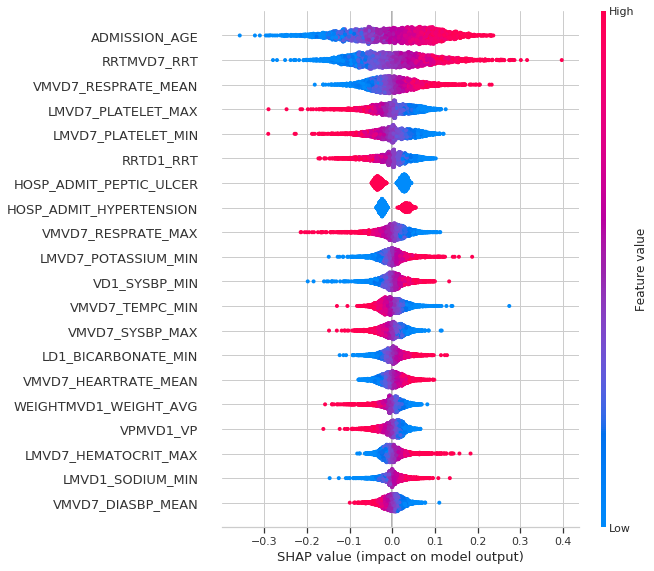

In [24]:
explainer = shap.DeepExplainer(model, X_train)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values[0], X_train, feature_names=X_colnames)

In [26]:
## plt.savefig("shap_1yr_model_values.pdf")

<Figure size 432x288 with 0 Axes>

### 3Mo Mortality Neural Network

In [45]:
model_file = "./models/3mo_Acc_0.724_30May2020_3mo_best_model.h5"

f = h5py.File(model_file, 'r')

print("Model version: ", f.attrs.get('keras_version'))
print("Keras version: ", keras.__version__)
print("")

model = keras.models.load_model(model_file)

Model version:  b'2.3.1'
Keras version:  2.3.1



In [46]:
model.summary()

Model: "sequential_110"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_472 (Dense)            (None, 256)               64256     
_________________________________________________________________
activation_472 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_363 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_473 (Dense)            (None, 128)               32896     
_________________________________________________________________
activation_473 (Activation)  (None, 128)               0         
_________________________________________________________________
dropout_364 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_474 (Dense)            (None, 4)              

In [47]:
predicted = model.predict(X_test)
## Round predictions to 1/0
predicted = predicted.round()

tn, fp, fn, tp = confusion_matrix(y_3mo_test, predicted).ravel()
specificity = tn / (tn+fp)

print("")
print("   Classification Matrix")
print(confusion_matrix(y_3mo_test, predicted))
print("")

print("")
print("   ROC AUC")
print(roc_auc_score(y_3mo_test, predicted).round(4))
print("")

print("")
print("   Sensitivity")
print(recall_score(y_3mo_test, predicted).round(4))
print("")

print("")
print("   Specificity")
print(specificity.round(4))
print("")

print("")
print("   Accuracy")
print(accuracy_score(y_3mo_test, predicted).round(4))
print("")

print("")
print("   F1 Score")
print(f1_score(y_3mo_test, predicted).round(4))
print("")


   Classification Matrix
[[409  98]
 [141 219]]


   ROC AUC
0.7075


   Sensitivity
0.6083


   Specificity
0.8067


   Accuracy
0.7243


   F1 Score
0.647



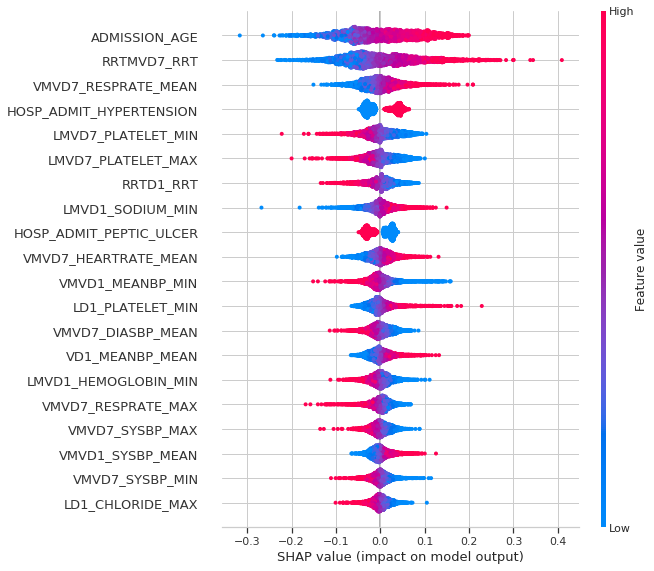

In [48]:
explainer = shap.DeepExplainer(model, X_train)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values[0], X_train, feature_names=X_colnames)